In [1]:
!pip install git+https://github.com/aVariengien/self-organized-control.git#subdirectory=code
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym[box2d] pyvirtualdisplay > /dev/null 2>&1

  Cloning https://github.com/aVariengien/self-organized-control.git to /tmp/pip-req-build-e7cin0ez
  Running command git clone -q https://github.com/aVariengien/self-organized-control.git /tmp/pip-req-build-e7cin0ez


In [2]:
!pip install Box2D

In [8]:
import tensorflow as tf
import numpy as np
import time
import SelfOrgControl.NeuralCA as NCA
from SelfOrgControl.NCA_DQN import DQNAgent
from SelfOrgControl.NeuralCAVisu import visualize_agent, show_influence_field
import gym
import matplotlib.pyplot as plt

In [4]:
#Start a virtual display to be able to render the cart-pole environment in Colab
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

In [5]:
print(gym.envs.registry.all())

env = gym.make("LunarLander-v2")
env.seed(0)

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

[0]

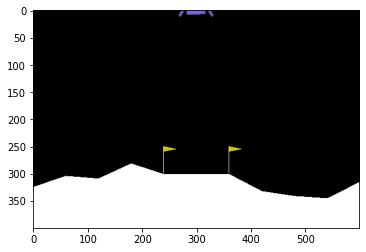

In [11]:
env.reset()
img = env.render(mode='rgb_array')

plt.imshow(img)
ipythondisplay.clear_output(wait=True)
ipythondisplay.display(plt.gcf())
ipythondisplay.clear_output(wait=True)

# 1. Defining Grid parameters

Similar to [TODO] we use a 32x32 Cellular Automata grid. The state $x_t$ of the environment at timestep $t$ is an 8-dimensional real-valued vector containing:
- X distance from target site (Cont.)
- Y distance from target site (Cont.)
- X velocity (Cont.)
- Y velocity (Cont.)
- Angle of ship (Cont.)
- Angular velocity of ship (Cont.)
- Left leg is grounded (Bin.)
- Right leg is grounded (Bin.)

Each dimension of the state space is encoded through two separate input cells.